befor  classification

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('cleaned_data.csv')

In [6]:
x = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

classification

* Importing the model

In [9]:
from sklearn.linear_model import LogisticRegression


**Creating** and training the model

In [10]:
log_reg_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg_balanced.fit(x_train_scaled, y_train)




LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Prediction

In [11]:
y_prob = log_reg_balanced.predict_proba(x_test_scaled)[:, 1]
threshold = 0.45
y_pred_threshold = (y_prob >= threshold).astype(int)

Evaluation

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_threshold))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

Threshold: 0.45
Accuracy: 0.6132075471698113

Confusion Matrix:
 [[432 287]
 [ 41  88]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       719
         1.0       0.23      0.68      0.35       129

    accuracy                           0.61       848
   macro avg       0.57      0.64      0.54       848
weighted avg       0.81      0.61      0.67       848



*Confusion* ***Matrix***

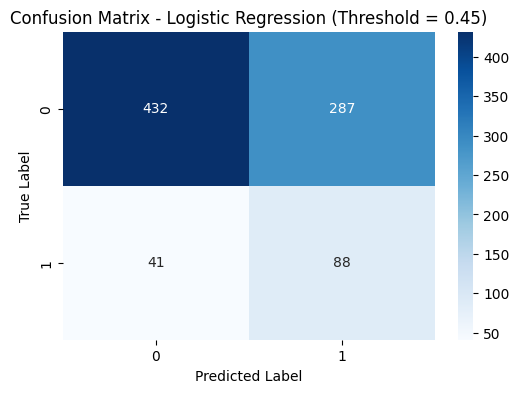

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Threshold = 0.45)")
plt.show()

Decision Tree للمقارنه مش اكتر

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78       719
         1.0       0.25      0.57      0.34       129

    accuracy                           0.67       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.67      0.71       848



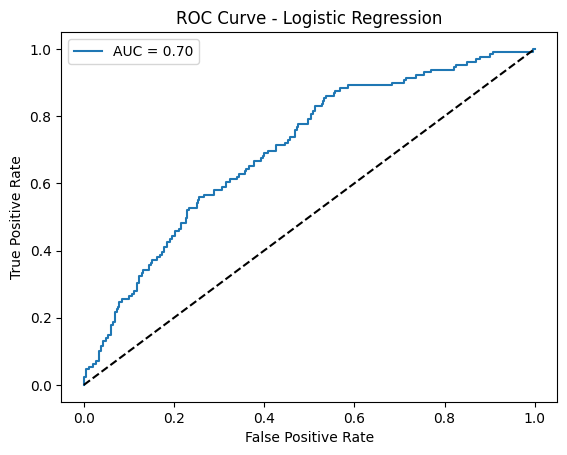

In [15]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg_balanced.predict_proba(x_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()